# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 16, 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [29]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).toarray()
y = newsgroups_train.target

X = np.transpose(X)

def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

X = normalize(X)

In [34]:
X.shape

(1771, 2369)

## 2. PCA - Principal Components Analysis

In [56]:
# <TODO> import proper class
from sklearn.decomposition import TruncatedSVD as PCA
# <TODO> uncomment below. Choose q
q = 4
# <TODO> uncomment below. initialize PCA model
pca = PCA(n_components=q)
Z=pca.fit_transform(X.T)
# <TODO> uncomment below. train PCA model and retrieve the low-dimension projection of X.
W = pca.components_
#Z=pca.transform(X)
# <TODO> uncomment below. retrieve explained variance ratio
var_ratio = pca.explained_variance_ratio_

In [57]:
print ('Ratio of variance explained: ', var_ratio)

Ratio of variance explained:  [ 0.03080441  0.01712899  0.01155359  0.00998797]


In [58]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (1771, 2369)
Reduced Shape:  (2369, 4)


## 3. Visualizing the reduced data points

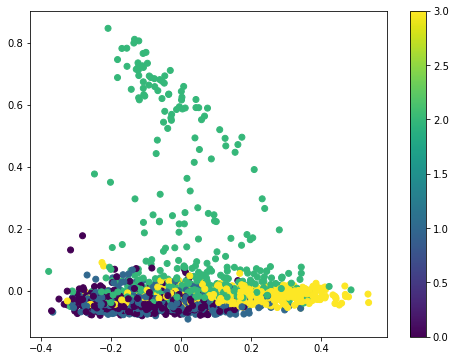

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [60]:
# <TODO> uncomment below. Retrieve W
W = pca.components_

In [61]:
W

array([[ 0.00561849,  0.00206203,  0.00835426, ...,  0.00673144,
         0.00707989, -0.00909559],
       [-0.00499712,  0.00150148, -0.00212945, ..., -0.00235553,
         0.00198362, -0.00765233],
       [ 0.00958253, -0.00726114,  0.01742528, ...,  0.00174688,
         0.01242927, -0.00654616],
       [ 0.00126182, -0.00594877,  0.00797333, ..., -0.00142496,
        -0.01982452, -0.03374544]])

In [62]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(W[i])

    print ('TOPIC ' + str(i))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

TOPIC 0
not we in god is and to that of the

TOPIC 1
n3jxp chastity dsl shameful cadre cs gordon banks geb pitt

TOPIC 2
not hell christians faith that his jesus he we god

TOPIC 3
uga georgia apple god ai university of mac edu the

